# GPGN 268 - Numpy and plotting, in class
By Ryan Du

02-18-2026

This notebook uses meteorological data from the Denver water department to introduce basic Python concepts.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load max temperature data into a numpy array.
# According to the README this corresponds to monthly maximum temperatures
# from 2000 to 2022 at the Dever Water Department meteorological station.
tmax = np.loadtxt(fname='../data/meteo_denver_tmax_2000_2022.txt', delimiter='\t')

In [3]:
# create an array from a list
a = np.array([9,0,2,1,0])
a

array([9, 0, 2, 1, 0])

In [5]:
b = [1,2,3]
b

[1, 2, 3]

In [6]:
# create an array of zeros with 9 rows and 3 columns
b = np.zeros((9,3))
print(b.shape)
print(b)

(9, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [7]:
# create an array of zeros with 9 rows and 3 columns
b = np.empty((9,3))
print(b.shape)
print(b)

(9, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [9]:
# create a 3D array of ones
c = np.ones((3,2,3))*1e16
print(c.shape)
print(c)

(3, 2, 3)
[[[1.e+16 1.e+16 1.e+16]
  [1.e+16 1.e+16 1.e+16]]

 [[1.e+16 1.e+16 1.e+16]
  [1.e+16 1.e+16 1.e+16]]

 [[1.e+16 1.e+16 1.e+16]
  [1.e+16 1.e+16 1.e+16]]]


In [10]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [12]:
for i in np.arange(6):
    print(i)

0
1
2
3
4
5


In [16]:
months = np.arange(12)+1
months2 = np.arange(1,13)
print(months)
print(months2)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [17]:
np.arange(10,20,2.5)

array([10. , 12.5, 15. , 17.5])

In [20]:
np.linspace(0,10,7)

array([ 0.        ,  1.66666667,  3.33333333,  5.        ,  6.66666667,
        8.33333333, 10.        ])

In [22]:
# similarly for a sequance of number that are log spaced
np.logspace(1,2,10,base=2)

array([2.        , 2.16011948, 2.33305808, 2.5198421 , 2.72158   ,
       2.93946898, 3.1748021 , 3.42897593, 3.70349885, 4.        ])

In [23]:
np.logspace?

Signature:      
np.logspace(
    start,
    stop,
    num=50,
    endpoint=True,
    base=10.0,
    dtype=None,
    axis=0,
)
Call signature:  np.logspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function logspace at 0x77eec0163950>
File:            ~/miniconda3/envs/GPGN268/lib/python3.14/site-packages/numpy/_core/function_base.py
Docstring:      
Return numbers spaced evenly on a log scale.

In linear space, the sequence starts at ``base ** start``
(`base` to the power of `start`) and ends with ``base ** stop``
(see `endpoint` below).

.. versionchanged:: 1.25.0
    Non-scalar 'base` is now supported

Parameters
----------
start : array_like
    ``base ** start`` is the starting value of the sequence.
stop : array_like
    ``base ** stop`` is the final value of the sequence, unless `endpoint`
    is False.  In that case, ``num + 1`` values are spaced over the
    interval in log-space, of which all but the last (a sequence of
    length `num`) are

In [24]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

((50, 100), (50, 100))

In [29]:
plt.pcolormesh(x**2+y**2)
plt.colorbar()

ValueError: operands could not be broadcast together with shapes (100,) (50,) 

In [51]:
a = np.array([-1, 2, 3.2, -9, 10])

In [52]:
a<0

array([ True, False, False,  True, False])

In [53]:
a[a<0]

array([-1., -9.])

In [54]:
print('a before:', a)
a[a<0] = np.nan
print('a after:', a)

a before: [-1.   2.   3.2 -9.  10. ]
a after: [ nan  2.   3.2  nan 10. ]


In [57]:
a = np.array([-1, 2, 3.2, -9, 10])
print(a)
np.where(a<0)

[-1.   2.   3.2 -9.  10. ]


(array([0, 3]),)

In [58]:
0.1+0.2==0.3

False

In [59]:
0.1+0.2

0.30000000000000004

In [62]:
np.isclose(0.1+0.2, 0.3)

np.True_

In [63]:
# np.abs(0.1+0.2-0.3) < 1e-13

In [65]:
a = np.arange(9).reshape(3, 3)
print(a)
v = a[:, 1:]     # slice → view

v[0, 0] = 999    # modifies the shared buffer
print("a after modifying v:\n", a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
a after modifying v:
 [[  0 999   2]
 [  3   4   5]
 [  6   7   8]]


In [67]:
def process_in_place(x):
    # Some library function you don't control that mutates input
    x -= x.mean()

a = np.arange(6, dtype=float)
v = a            # view
process_in_place(v)   # mutates 'a' too
print("a unexpectedly changed:", a)

# Safe approach:
a = np.arange(6, dtype=float)
v = a.copy()     # deep copy
v = np.copy(a)
process_in_place(v)   # a is safe
print("a preserved:", a)

a unexpectedly changed: [-2.5 -1.5 -0.5  0.5  1.5  2.5]
a preserved: [0. 1. 2. 3. 4. 5.]


In [68]:
# Load max temperature data into a numpy array.
# According to the README this corresponds to monthly maximum temperatures
# from 2000 to 2022 at the Dever Water Department meteorological station.
tmax = np.loadtxt(fname='../data/meteo_denver_tmax_2000_2022.txt', delimiter='\t')

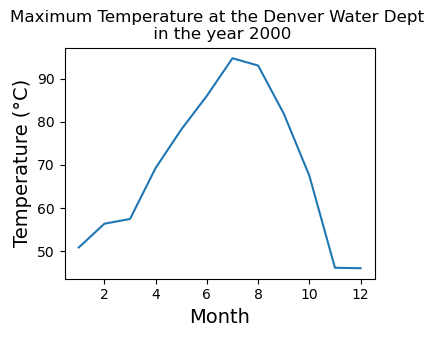

In [69]:
months = np.arange(1,13,1)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(months, tmax[0,:])
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Temperature (°C)', fontsize=14)

plt.title('Maximum Temperature at the Denver Water Dept \n in the year 2000')
plt.show()

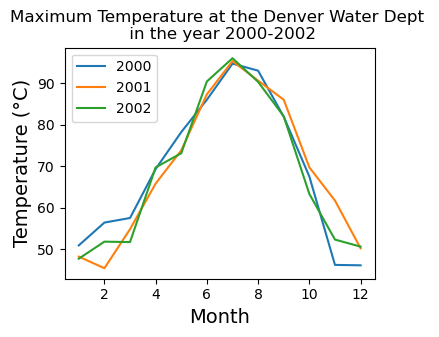

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(months, tmax[0,:],label='2000')
ax.plot(months, tmax[1,:],label='2001')
ax.plot(months, tmax[2,:],label='2002')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Temperature (°C)', fontsize=14)
ax.legend()

plt.title('Maximum Temperature at the Denver Water Dept \n in the year 2000-2002')

plt.savefig("output_figs/den_max_temp_00to02.pdf", bbox_inches="tight")
plt.show()

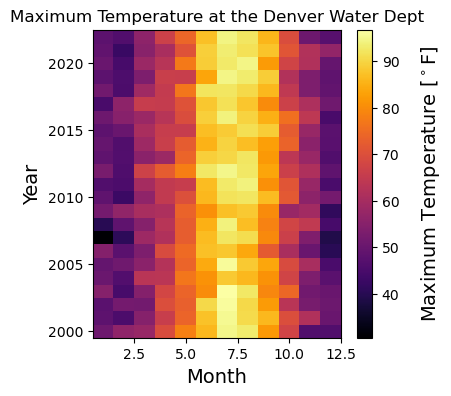

In [75]:
# Create an array for the calendar months
months = np.arange(1, 13)
# Create an array for years from 2000 to 2022
years = np.arange(2000, 2023)

# Visualize the 2D array
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
cs = ax.pcolor(months, years, tmax, cmap='inferno')
ax.set_ylabel('Year', fontsize=14)
ax.set_xlabel('Month', fontsize=14)
cbar = plt.colorbar(cs)
cbar.set_label(r'Maximum Temperature [$^\circ$F]', fontsize=14, labelpad=14)
plt.title('Maximum Temperature at the Denver Water Dept')

plt.savefig("output_figs/den_max_temp_00to02.png", dpi=400, bbox_inches="tight")
plt.show()